<h1><center>Proyecto Garantías a Siniestrar</h1></center>

# Limpieza de datos y Feature Engineering

El objetivo del proyecto es predecir las garantías que se van a siniestrar, como primer foco del proyecto, se decidio tomar del sector de retail el cliente que tiene más información demógráfica.

In [1]:
#importe de la librerias necesarias
import pantab
from tableauhyperapi import TableName
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid") #tema para las gráficas
pd.set_option('display.max_columns', None) #Configuración para que muestre todas las columnas de un dataframe
pd.set_option("max_rows", 50) #Configuración para que muestre hasta 50 filas de un dataframe

In [3]:
#lectura del df
table = TableName("Extract", "Extract")
df = pantab.frame_from_hyper('historico_cartera_clientexgarantia.hyper', table=table)

## 1. Limpieza del dataframe

Iniciaremos con la limpieza a nivel columnar, de aquellas columnas que por la naturaleza del problema no nos generen mucho valor, como aquellas que son caracteristicas del convenio y no de la cartera

In [4]:
df.shape

(2056840, 44)

In [5]:
df.nunique()

id_cartera               2056840
id_garantia               170591
nit_intermediario              1
id_cliente                128307
pagare                    170591
convenio                       1
producto                       2
fecha_corte                   60
fecha_desembolso             180
vlr_monto_des              53653
saldo_capital             702262
saldo_total               895603
num_cuotas_mora               34
fec_inicio_mora              983
fecha_cancelacion             59
estado_operacion               4
mes_cartera                   12
fecha_pago                    22
total_pagado                   0
sucursal                       1
cal_riesgo_obligacion          0
perfil                        14
ocupacion                      1
ciudad                        26
almacen                       88
negocio                        5
estrato                        1
nombre_producto                2
fecha_nacimiento               1
estado_civil                   1
regional  

In [6]:
df.columns

Index(['id_cartera', 'id_garantia', 'nit_intermediario', 'id_cliente',
       'pagare', 'convenio', 'producto', 'fecha_corte', 'fecha_desembolso',
       'vlr_monto_des', 'saldo_capital', 'saldo_total', 'num_cuotas_mora',
       'fec_inicio_mora', 'fecha_cancelacion', 'estado_operacion',
       'mes_cartera', 'fecha_pago', 'total_pagado', 'sucursal',
       'cal_riesgo_obligacion', 'perfil', 'ocupacion', 'ciudad', 'almacen',
       'negocio', 'estrato', 'nombre_producto', 'fecha_nacimiento',
       'estado_civil', 'regional', 'categoria', 'genero', 'edad',
       'nivel_ingresos', 'nivel_academico', 'segmentacion',
       'cod_estado_garantia', 'estado_garantia', 'archivo',
       'plazo_max_reclamacion', 'mora_minima', 'anio_fcorte', 'mes_fcorte'],
      dtype='object')

In [7]:
#verificamos que no hayan registros duplicados
df.duplicated().sum()

0

In [8]:
#Columnas que por su naturaleza no agregan valor
df.drop(['id_cartera', 'nit_intermediario', 'id_cliente', 'pagare', 'convenio', 'fecha_cancelacion', \
         'mes_cartera', 'fecha_pago', 'total_pagado', 'cal_riesgo_obligacion', 'archivo', 'plazo_max_reclamacion',\
        'mora_minima', 'anio_fcorte', 'mes_fcorte', 'estado_operacion'], axis='columns', inplace=True)

Disponemos de muchas variables categoricas demográficas que a primera vista tienen algunos nulos o vacíos, vamos a verificar cuantos.
'sucursal', 'perfil', 'ocupacion', 'ciudad', 'almacen','negocio', 'estrato','fecha_nacimiento', 'estado_civil',
'regional', 'categoria', 'genero', 'edad','nivel_ingresos', 'nivel_academico', 'segmentacion'

In [9]:
#Llenado campos vacíos con nulos
for i in df.columns:
    df[i]= df[i].replace(r'', np.nan, regex=True)

In [10]:
#columnas con más de un valor nulo
print(df.shape)
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

(2056840, 28)


ocupacion           2056840
estrato             2056840
fecha_nacimiento    2056840
estado_civil        2056840
regional            2056840
categoria           2056840
genero              2056840
edad                2056840
nivel_ingresos      2056840
nivel_academico     2056840
segmentacion        2056840
nombre_producto     2026869
fec_inicio_mora     1229698
dtype: int64

Aquellas columnas con todos los elementos nulos los eliminaremos

In [11]:
df.drop(['ocupacion', 'estrato', 'fecha_nacimiento', 'estado_civil', 'regional', \
         'categoria', 'genero', 'edad', 'nivel_ingresos', 'nivel_academico', \
         'segmentacion', 'nombre_producto'], axis=1, inplace=True)

Ahora vamos a explorar las demás

<b>Sucursal

In [12]:
df.sucursal.value_counts(dropna=False)

PRINCIPAL    2056840
Name: sucursal, dtype: Int64

Dado que solo tiene un posible valor vamos a eliminar esta columna, no agrega valor

In [13]:
df.drop('sucursal', axis=1, inplace=True)

<b> Perfil

In [14]:
df.perfil.value_counts(dropna=False)

Empleado                  1105094
Independiente Informal     557645
EMPLEADO                   110819
Independiente Formal       102757
Pensionado                  63906
INDEPENDIENTE INFORMAL      54402
empleado                    34076
Ama de casa                 12332
PENSIONADO                   8562
INDEPENDIENTE FORMAL         3334
AMA DE CASA                  3064
Taxista Propietario           605
Transportador                 231
Taxista no Propietario         13
Name: perfil, dtype: Int64

En este caso vamos a normalizar la columna para que todos los caracteres estén en mayuscula.

In [15]:
df['perfil'] = df['perfil'].str.upper()
df.perfil.value_counts(dropna=False)

EMPLEADO                  1249989
INDEPENDIENTE INFORMAL     612047
INDEPENDIENTE FORMAL       106091
PENSIONADO                  72468
AMA DE CASA                 15396
TAXISTA PROPIETARIO           605
TRANSPORTADOR                 231
TAXISTA NO PROPIETARIO         13
Name: perfil, dtype: Int64

<b>Ciudad

In [16]:
df.ciudad.value_counts(dropna=False)

MEDELLIN           399948
BOGOTA             267967
PASTO              221612
CALI               217716
BUCARAMANGA        193538
VILLAVICENCIO       97322
BARRANCABERMEJA     73713
NEIVA               67561
YOPAL               67412
APARTADO            63044
IBAGUE              52743
PIE DE CUESTA       48709
RIONEGRO            46818
PEREIRA             45411
DOSQUEBRADAS        39553
MOSQUERA            31779
MONTERIA            26408
VALLEDUPAR          20181
FLORIDABLANCA       17459
BARRANQUILLA        17303
CUCUTA              12592
MANIZALES           10553
TUNJA                9579
SINCELEJO            7572
SOLEDAD               324
BELLO                  23
Name: ciudad, dtype: Int64

<b>Almacen

In [17]:
df.almacen.value_counts(dropna=False)

ALMACEN2 ÚNICO                154077
ALMACEN2 FLORIDA              110457
ALMACEN2 BUCARAMANGA No.2     105246
ALMACEN2 BELLO                 92949
ALMACEN3 PASTO BOLIVAR         88045
                               ...  
NILHO RIONEGRO                    33
ALMACEN2 NIHLO BELLO              23
ALMACEN2 COLOMBIA                 22
ALMACEN2 ALMACEN 1 DE MAYO        17
ALMACEN2 ALMACEN SINCELEJO        10
Name: almacen, Length: 88, dtype: Int64

<b>Negocio

In [18]:
df['negocio'] = df['negocio'].str.upper()
df.negocio.value_counts(dropna=False)

NEGOCIO2    1178392
NEGOCIO3     399000
NEGOCIO5     234829
NEGOCIO4     221612
NEGOCIO1      23007
Name: negocio, dtype: Int64

### Estados de garantías de interés

Ahora eliminaremos los estados de la columnas que no nos interesan para este análisis.

In [19]:
df.estado_garantia.value_counts()

CANCELADA - CANCELACIÓN TOTAL DEL CRÉDITO    1774456
PAGADA                                        172503
VIGENTE                                        38435
RECUPERADA PARCIAL                             35490
RECUPERADA TOTAL                               25555
VIGENTE – NO APTA PARA RECLAMACION              7136
VIGENTE REESTRUCTURACION                        1113
CANCELADA - DESISTIMIENTO                       1065
CANCELADA NOVACION                              1041
CANCELADA FRAUDE                                  46
Name: estado_garantia, dtype: Int64

In [20]:
df.cod_estado_garantia.value_counts()

2     1774456
12     172503
1       38435
13      35490
14      25555
47       7136
39       1113
22       1065
19       1041
50         46
Name: cod_estado_garantia, dtype: Int64

Dado el análisis a realizar, solo nos interesan las garantías que estén en estados CANCELADA - CANCELACIÓN TOTAL DEL CRÉDITO, PAGADA, RECUPERADA PARCIAL y RECUPERADA TOTAL  

In [21]:
df = df[df['cod_estado_garantia'].isin([2,12,13,14])].copy()
df.estado_garantia.value_counts()

CANCELADA - CANCELACIÓN TOTAL DEL CRÉDITO    1774456
PAGADA                                        172503
RECUPERADA PARCIAL                             35490
RECUPERADA TOTAL                               25555
Name: estado_garantia, dtype: Int64

In [22]:
df.cod_estado_garantia.value_counts()

2     1774456
12     172503
13      35490
14      25555
Name: cod_estado_garantia, dtype: Int64

---

## 2. Variable Objetivo
Las columnas estado_garantia determinará la variable objetivo, las operaciones en estados 12, 13 y 14 son aquellas que entraron en default, mientras que las que están en estado 2 son las que no entraron en default

In [23]:
df['y'] = (~(df.cod_estado_garantia == 2)).astype(int)

Dado que la base de datos en el momento no tiene el formato esperado, vamos a realizar el feature engineering, y una vez finalizado y que tengamos el dataset en formato esperado, realizaremos la análisis exploratorio de losd atos

---

## 3. Feature Engineering

In [24]:
#Calculo de días de mora
df['dias_mora'] = (df['fecha_corte'] - df['fec_inicio_mora']).dt.days
df['dias_mora'].fillna(0, inplace=True)

In [25]:
#Boleano que indica si en una fecha de corte se tuvo mora o no
df['dias_mora_bool'] = df['dias_mora'] > 0

In [26]:
#garantías en mora, cero pagos, es decir que el saldo capital es igual al desembolso
df.loc[df['dias_mora_bool'] == True,'cero_pagos'] = df.loc[df['dias_mora_bool'] == True,'saldo_capital'] == df.loc[df['dias_mora_bool'] == True,'vlr_monto_des']

In [27]:
#Boleano para identificar los no pagos
df['saldo_tot_mayor_desembolso'] = df['saldo_total'] > df['vlr_monto_des']

<b> Moras continuas </b>
    
La continuidad de las moras está definida como la consecución de dos o más moras en fechas de corte contiguas. Para este calculo debemos realizar varios operaciones primero, como ordenar el dataframe por id_garantia y fecha de corte, posterios a ello calcular la cantidad de fechas de corte y finalmente a pivotear el DataFrame de modo que las numeros de fecha de corte queden columnarmente, para luego proceder a realizar este calculo

In [28]:
#Ordenamiento del dataframe para posterior pivot
df.sort_values(by=['id_garantia', 'fecha_corte'], ascending=[True, True], inplace=True)

In [29]:
#Definición de numeros de fechas de corte para pivot
df['numero_corte'] = df.groupby('id_garantia')['fecha_corte'].rank(method='first')

In [30]:
#pivot del dataframe
df_pivot = df[['id_garantia', 'producto', 'fecha_desembolso', 'vlr_monto_des',\
               'saldo_capital', 'saldo_total', 'perfil', 'ciudad', 'almacen', \
               'negocio','y', 'dias_mora', 'dias_mora_bool', 'numero_corte',\
               'saldo_tot_mayor_desembolso', 'cero_pagos'\
              ]].pivot(index = ['id_garantia', 'vlr_monto_des','producto', 'fecha_desembolso', \
                                'perfil', 'ciudad', 'almacen', 'negocio', 'y'], columns='numero_corte')
df_pivot.head()

saldo_capital  \
numero_corte                                                                                                              1.0    
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y                 
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0             0   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        699904   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        966900   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        303770   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        449898   

                                                                                                                          \
numero_corte                                                                                                        2.0    
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y           
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0    <NA>   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  649236   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  806354   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  281780   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  379507   

                                                                                                                          \
numero_corte                                                                                                        3.0    
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y           
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0    <NA>   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  597290   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  716090   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  259235   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  307340   

                                                                                                                          \
numero_corte                                                                                                        4.0    
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y           
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0    <NA>   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  544033   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  623549   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  236121   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  233353   

                                                                                             

In [31]:
#Definicion de la columna
df_pivot['moras_continuas'] = 0
df_pivot['dias_mora_bool'] = df_pivot['dias_mora_bool'].fillna(False)
df_pivot.head()

saldo_capital  \
numero_corte                                                                                                               1.0   
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y                 
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0             0   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        699904   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        966900   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        303770   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0        449898   

                                                                                                                          \
numero_corte                                                                                                         2.0   
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y           
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0    <NA>   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  649236   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  806354   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  281780   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  379507   

                                                                                                                          \
numero_corte                                                                                                         3.0   
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y           
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0    <NA>   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  597290   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  716090   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  259235   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  307340   

                                                                                                                          \
numero_corte                                                                                                         4.0   
id_garantia vlr_monto_des producto  fecha_desembolso perfil                 ciudad almacen            negocio  y           
6039898     192210        PRODUCTO2 2019-01-02       INDEPENDIENTE INFORMAL BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0    <NA>   
6039899     699904        PRODUCTO2 2019-01-02       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  544033   
6039900     966900        PRODUCTO2 2019-01-04       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  623549   
6039901     303770        PRODUCTO2 2019-01-05       EMPLEADO               BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  236121   
6039902     449898        PRODUCTO2 2019-01-06       INDEPENDIENTE FORMAL   BOGOTA ALMACEN3 DE LA 170 NEGOCIO3 0  233353   

                                                                                             

In [32]:
#Cálculo de cantidad de moras continuas
for index, row in df_pivot.iterrows():
    conteo_continuidad = 0
    for i in range(1,32):
        if (row["dias_mora_bool"][i]==True) & (row["dias_mora_bool"][i+1]==True) & (row["dias_mora_bool"][i+2]==False):
            conteo_continuidad += 1
    df_pivot.loc[index,'moras_continuas'] = conteo_continuidad

In [33]:
df_pivot['moras_continuas_2'] = 0
for index, row in df_pivot.iterrows():
    conteo_continuidad = 0
    for i in range(1,33):
        if (row["dias_mora_bool"][i]==True) & (row["dias_mora_bool"][i+1]==False):
            conteo_continuidad += 1
    df_pivot.loc[index,'moras_continuas_2'] = conteo_continuidad

In [34]:
#columna de numero de veces en mora
df_pivot['veces_en_mora']=df_pivot['dias_mora_bool'].sum(axis=1)

In [35]:
#columna para sumarizar la cantidad de veces que una garantía tuvo el saldo mayor al desembolso
df_pivot['veces_saldo_tot_mayor_desembolso'] = df_pivot['saldo_tot_mayor_desembolso'].sum(axis=1)

In [36]:
#columna para sumarizar la cantidad de veces que una garantía tuvo el saldo capital igual al desembolso, es decir, cero pagos
df_pivot['veces_cero_pagos'] = df_pivot['cero_pagos'].sum(axis=1)

In [37]:
df_pivot.reset_index(inplace=True)
#tomamos las columnas de interes después de haber hecho el feature engineering
df_final=df_pivot[['id_garantia','vlr_monto_des','producto','perfil', 'ciudad', 'almacen', 'negocio', 'veces_en_mora', 'veces_saldo_tot_mayor_desembolso', 'veces_cero_pagos', 'moras_continuas', 'moras_continuas_2', 'y']]
#eliminamos el nivel de numero de corte, ya no lo necesitamos
df_final.columns = df_final.columns.droplevel('numero_corte')
df_final.head()

,id_garantia,vlr_monto_des,producto,perfil,ciudad,almacen,negocio,veces_en_mora,veces_saldo_tot_mayor_desembolso,veces_cero_pagos,moras_continuas,moras_continuas_2,y
0,6039898,192210,PRODUCTO2,INDEPENDIENTE INFORMAL,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,0,0.0,0.0,0,0,0
1,6039899,699904,PRODUCTO2,EMPLEADO,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,5,0.0,0.0,1,2,0
2,6039900,966900,PRODUCTO2,EMPLEADO,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,2,0.0,0.0,1,1,0
3,6039901,303770,PRODUCTO2,EMPLEADO,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,0,0.0,0.0,0,0,0
4,6039902,449898,PRODUCTO2,INDEPENDIENTE FORMAL,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,2,0.0,0.0,1,1,0


In [38]:
df_final.to_csv('df_final_proyecto_estructuracion.csv', index=False)

---

## 4. Análisis explotario de los datos
En este punto disponemos del dataframe df_final, el cual tiene el nivel de detalle esperado, es decir, una fila por cada Id de Garantía, ahora procederemos con el análisis exploratorio

In [39]:
#Función para realizar graficar barras horizontales con los labels
def barh_labels(y, title, xlabel, ylabel, figsize=(6,4), j=100, k=300):
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(y.index, y, height=0.75, color="#003952")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    _, xmax = plt.xlim()
    plt.xlim(0, xmax+k)
    for i, v in enumerate(y):
        ax.text(v + j, i, str(v), color='black', ha='left', va='center')
    plt.show()

<b>Variable objetivo

In [40]:
#porcentaje y numero de garantias siniestradas y no siniestradas
print(df_final['y'].value_counts(normalize=True))
df_final['y'].value_counts()

0    0.931697
1    0.068303
Name: y, dtype: float64


0    156881
1     11501
Name: y, dtype: int64

### Variables Categóricas
<b>Ciudades</b>

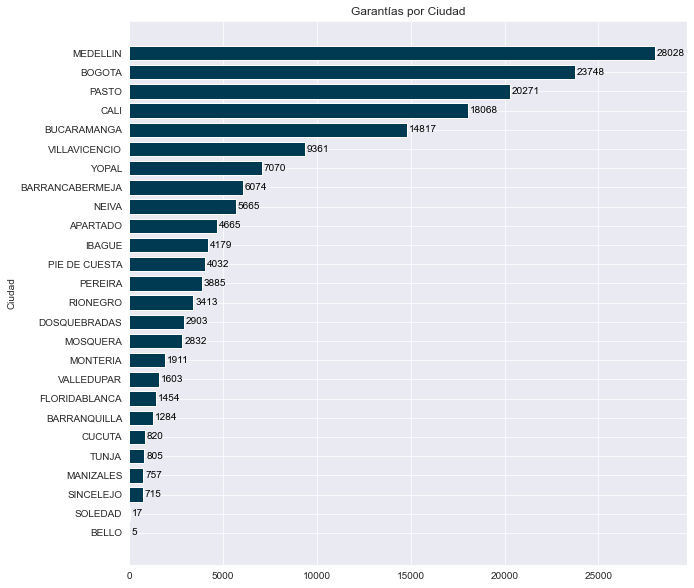

In [41]:
barh_labels(df_final.ciudad.value_counts(dropna = False).sort_values(), 'Garantías por Ciudad', '', 'Ciudad', (10,10))

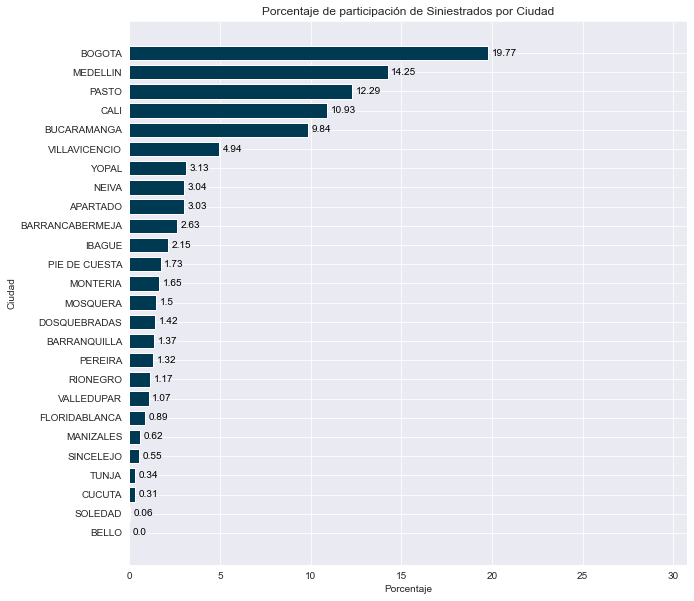

In [42]:
barh_labels((df_final.groupby('ciudad').sum()['y'].sort_values() / df_final.y.sum() * 100).round(2), 'Porcentaje de participación de Siniestrados por Ciudad', 'Porcentaje', 'Ciudad', (10,10), j=0.2, k=10)

<b>Negocio

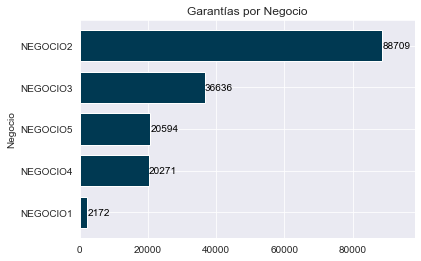

In [43]:
barh_labels(df_final.negocio.value_counts(dropna = False).sort_values(), 'Garantías por Negocio', '', 'Negocio', (6,4), k=5000)

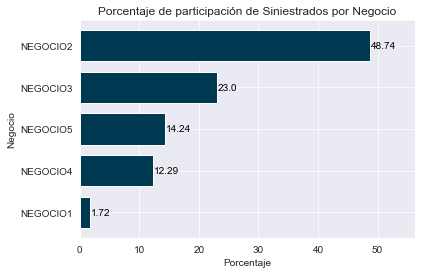

In [44]:
barh_labels((df_final.groupby('negocio').sum()['y'].sort_values() / df_final.y.sum() * 100).round(2), 'Porcentaje de participación de Siniestrados por Negocio', 'Porcentaje', 'Negocio', j=0.2, k=5)

<b>Almacén

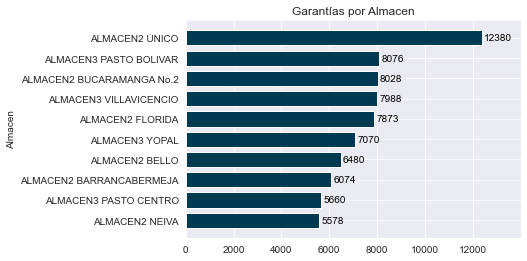

In [45]:
barh_labels(df_final.almacen.value_counts(dropna = False).head(10).sort_values(), 'Garantías por Almacen', '', 'Almacen', (6,4), k=1000)

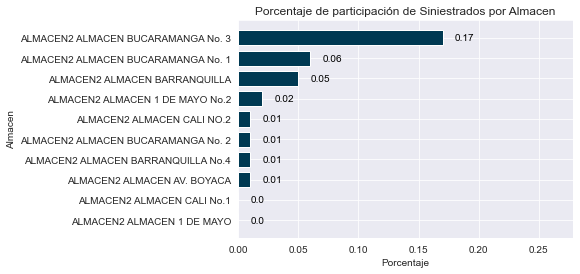

In [46]:
barh_labels((df_final.groupby('almacen').sum()['y'].head(10).sort_values() / df_final.y.sum() * 100).round(2), 'Porcentaje de participación de Siniestrados por Almacen', 'Porcentaje', 'Almacen', j=0.01, k=0.1)

<b>Perfil

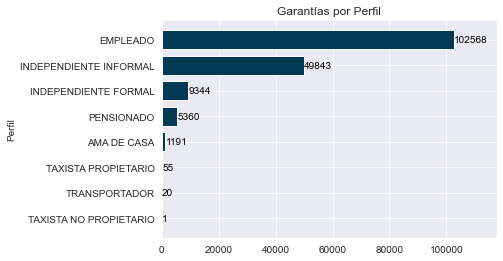

In [47]:
barh_labels(df_final.perfil.value_counts(dropna = False).sort_values(), 'Garantías por Perfil', '', 'Perfil', (6,4), k=10000)

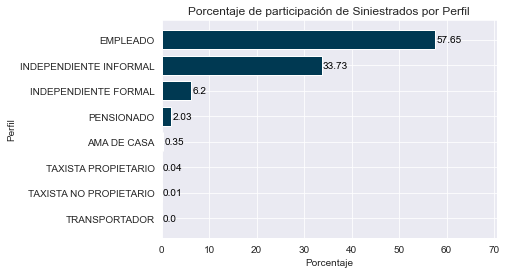

In [48]:
barh_labels((df_final.groupby('perfil').sum()['y'].sort_values() / df_final.y.sum() * 100).round(2), 'Porcentaje de participación de Siniestrados por Perfil', 'Porcentaje', 'Perfil', j=0.2, k=10)

<b>Producto

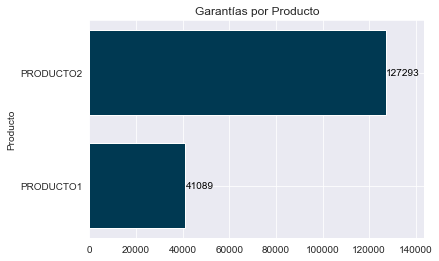

In [49]:
barh_labels(df_final.producto.value_counts(dropna = False).sort_values(), 'Garantías por Producto', '', 'Producto', (6,4), k=10000)

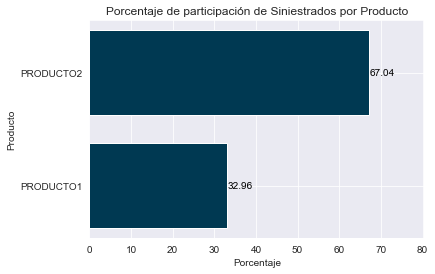

In [50]:
barh_labels((df_final.groupby('producto').sum()['y'].sort_values() / df_final.y.sum() * 100).round(2), 'Porcentaje de participación de Siniestrados por Producto', 'Porcentaje', 'Producto', j=0.2, k=10)

### Variables Numéricas
<b>Veces en mora

<AxesSubplot:title={'center':'veces_en_mora'}, xlabel='y'>

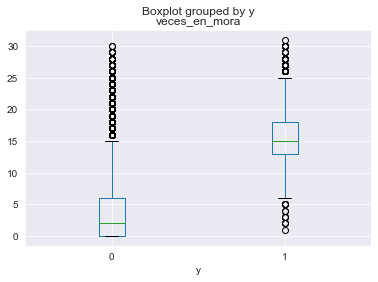

In [51]:
df_final.boxplot(column='veces_en_mora', by='y')

<b> Veces saldo total mayor a desembolso

<AxesSubplot:title={'center':'veces_saldo_tot_mayor_desembolso'}, xlabel='y'>

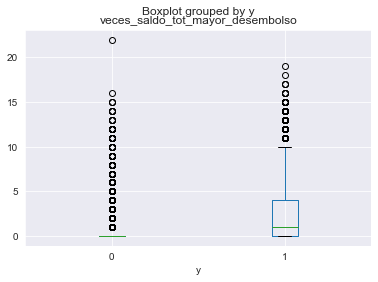

In [52]:
df_final.boxplot(column='veces_saldo_tot_mayor_desembolso', by='y')

<b> Veces cero pagos

<AxesSubplot:title={'center':'veces_cero_pagos'}, xlabel='y'>

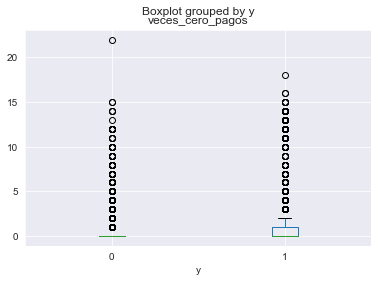

In [53]:
df_final.boxplot(column='veces_cero_pagos', by='y')

<b>Moras continuas

<AxesSubplot:title={'center':'moras_continuas'}, xlabel='y'>

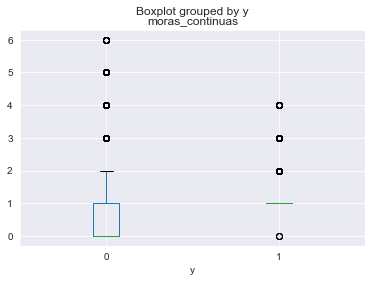

In [54]:
df_final.boxplot(column='moras_continuas', by='y')

<b>Moras continuas 2

<AxesSubplot:title={'center':'moras_continuas_2'}, xlabel='y'>

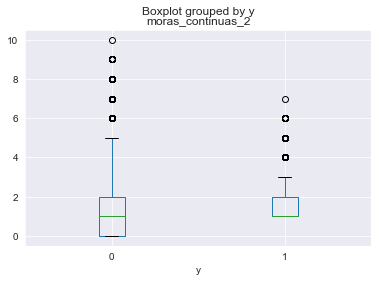

In [55]:
df_final.boxplot(column='moras_continuas_2', by='y')

### Correlación

Para realizar el análisis de correlación vamos a proceder a realizar one hot encoding para las variables categóricas

<b>Correlación entre los almacenes y la variable objetivo</b>

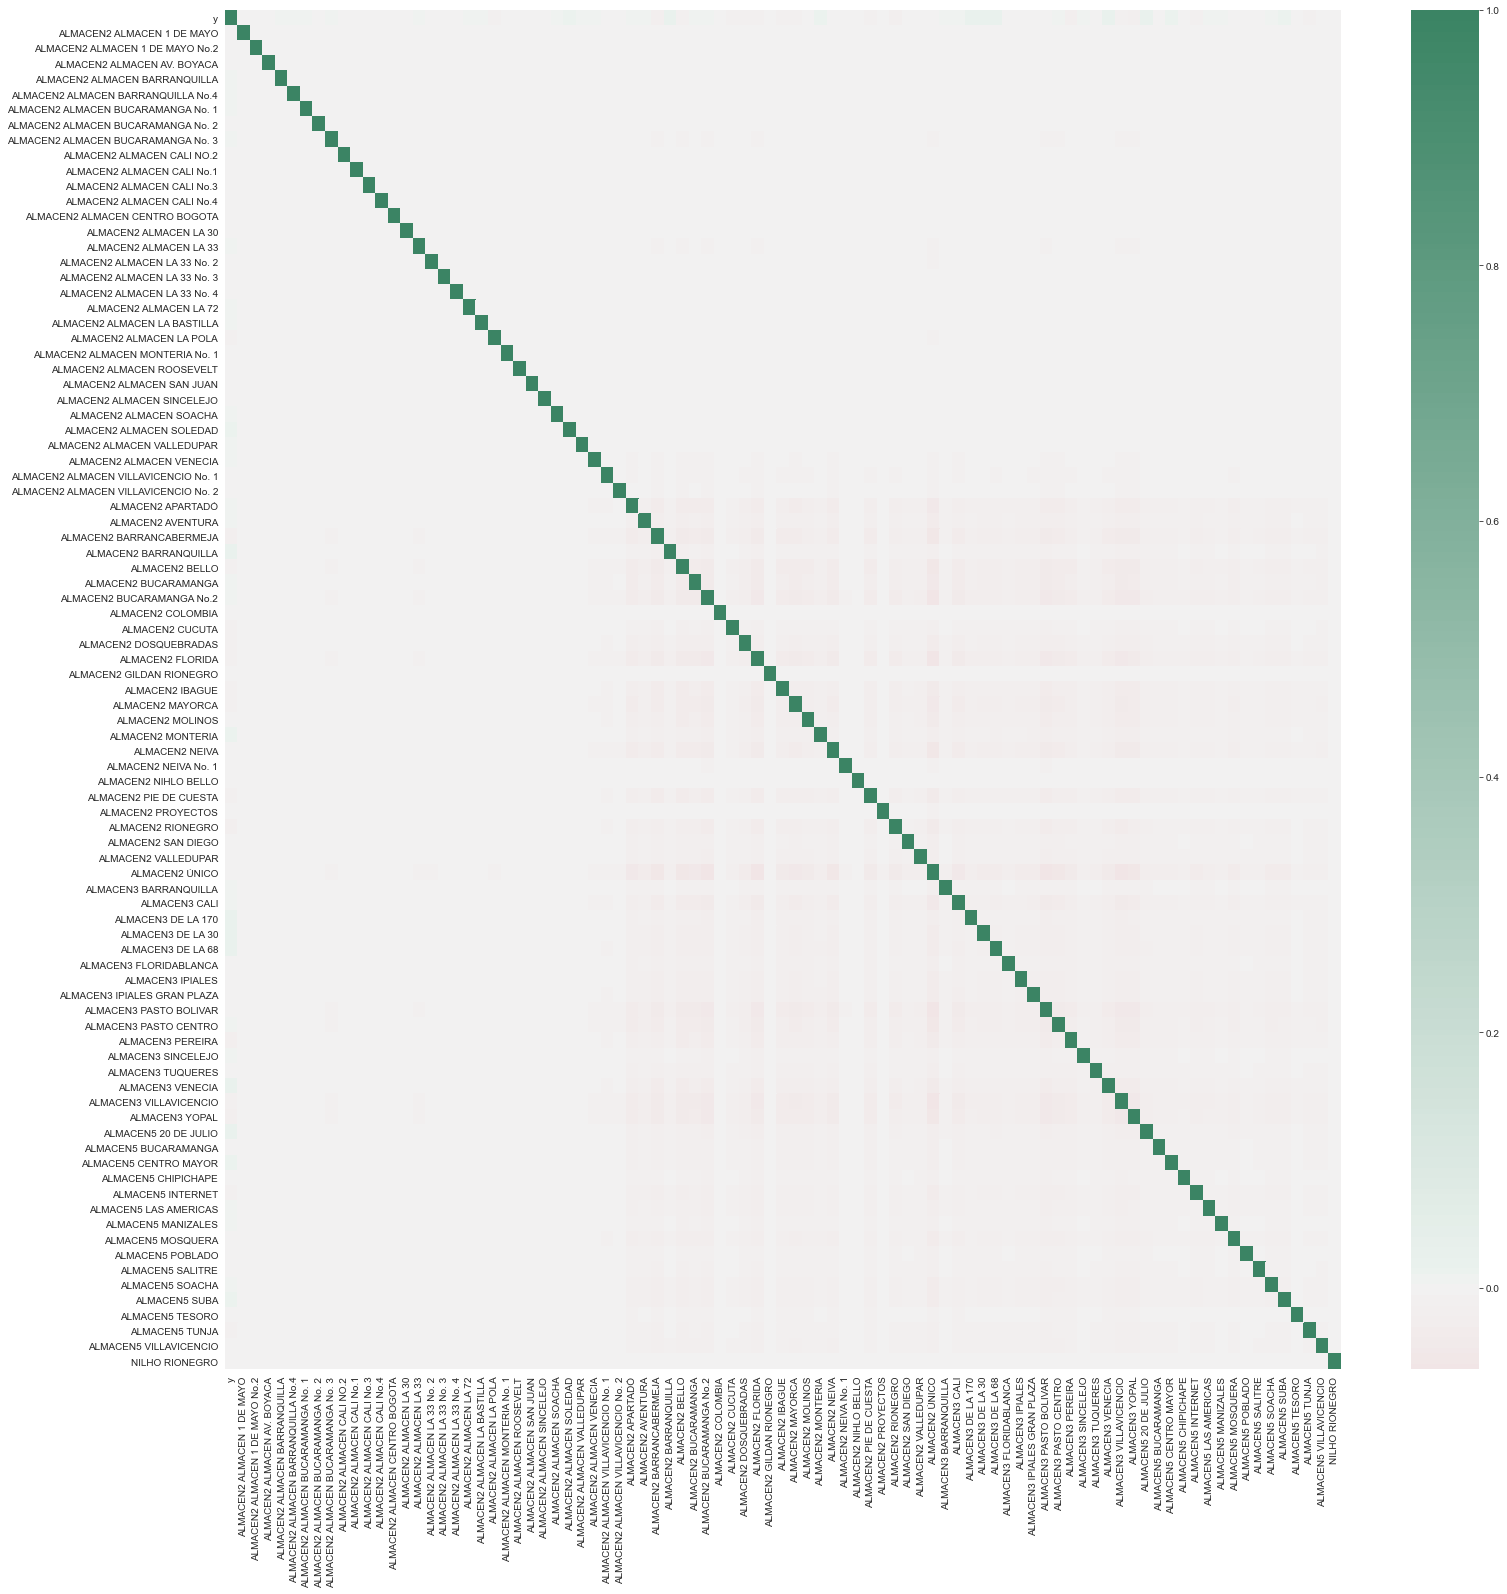

In [56]:
df_corr_almacen = df_final.copy()
df_corr_almacen = df_corr_almacen.merge(pd.get_dummies(df_corr_almacen["almacen"]), left_index=True, right_index=True).copy()
df_corr_almacen.drop(['producto', 'perfil', 'ciudad', 'almacen', 'negocio', 'id_garantia', \
                      'vlr_monto_des', 'veces_en_mora', 'veces_saldo_tot_mayor_desembolso', \
                      'veces_cero_pagos','moras_continuas', 'moras_continuas_2'], axis=1, inplace=True)
df_corr_almacen = df_corr_almacen.corr()
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(df_corr_almacen, cmap=cmap, center=0)
plt.show()

<b>Correlación entre los negocios y la variable objetivo</b>

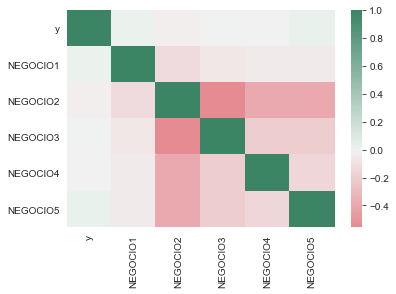

In [57]:
df_corr_negocio = df_final.copy()
df_corr_negocio = df_corr_negocio.merge(pd.get_dummies(df_corr_negocio["negocio"]), left_index=True, right_index=True).copy()
df_corr_negocio.drop(['producto', 'perfil', 'ciudad', 'negocio', 'almacen', 'id_garantia', \
                      'vlr_monto_des', 'veces_en_mora', 'veces_saldo_tot_mayor_desembolso', \
                      'veces_cero_pagos','moras_continuas', 'moras_continuas_2'], axis=1, inplace=True)
df_corr_negocio = df_corr_negocio.corr()
#plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(df_corr_negocio, cmap=cmap, center=0)
plt.show()

<b>Correlación entre los perfiles y la variable objetivo</b>

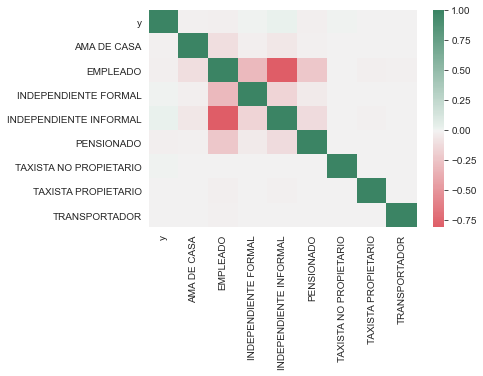

In [58]:
df_corr_perfil = df_final.copy()
df_corr_perfil = df_corr_perfil.merge(pd.get_dummies(df_corr_perfil["perfil"]), left_index=True, right_index=True).copy()
df_corr_perfil.drop(['producto', 'perfil', 'ciudad', 'almacen', 'negocio', 'id_garantia', \
                      'vlr_monto_des', 'veces_en_mora', 'veces_saldo_tot_mayor_desembolso', \
                      'veces_cero_pagos','moras_continuas', 'moras_continuas_2'], axis=1, inplace=True)
df_corr_perfil = df_corr_perfil.corr()
#plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(df_corr_perfil, cmap=cmap, center=0)
plt.show()

<b>Correlación entre las ciudades y la variable objetivo</b>

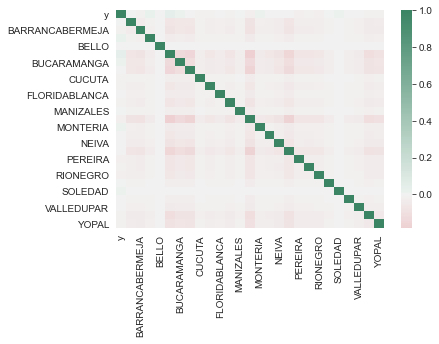

In [59]:
df_corr_ciudad = df_final.copy()
df_corr_ciudad = df_corr_ciudad.merge(pd.get_dummies(df_corr_ciudad["ciudad"]), left_index=True, right_index=True).copy()
df_corr_ciudad.drop(['producto', 'perfil', 'ciudad', 'almacen', 'negocio', 'id_garantia', \
                      'vlr_monto_des', 'veces_en_mora', 'veces_saldo_tot_mayor_desembolso', \
                      'veces_cero_pagos','moras_continuas', 'moras_continuas_2'], axis=1, inplace=True)
df_corr_ciudad = df_corr_ciudad.corr()
#plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(df_corr_ciudad, cmap=cmap, center=0)
plt.show()

<b>Correlación entre los productos y la variable objetivo</b>

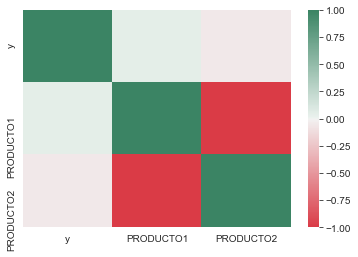

In [60]:
df_corr_producto = df_final.copy()
df_corr_producto = df_corr_producto.merge(pd.get_dummies(df_corr_producto["producto"]), left_index=True, right_index=True).copy()
df_corr_producto.drop(['producto', 'perfil', 'ciudad', 'almacen', 'negocio', 'id_garantia', \
                      'vlr_monto_des', 'veces_en_mora', 'veces_saldo_tot_mayor_desembolso', \
                      'veces_cero_pagos','moras_continuas', 'moras_continuas_2'], axis=1, inplace=True)
df_corr_producto = df_corr_producto.corr()
#plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(df_corr_producto, cmap=cmap, center=0)
plt.show()

<b>Correlación entre las variables númericas y la variable objetivo</b>

<AxesSubplot:>

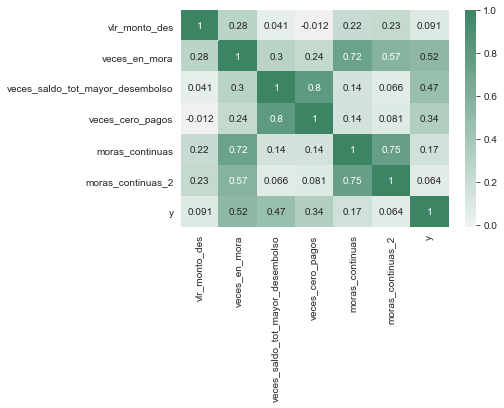

In [61]:
#Mapa de calor entre variables númericas
sns.heatmap(df_final.loc[:, df_final.columns != 'id_garantia'].corr(), cmap=cmap, center=0, annot=True)

<b>Correlación de todas las variables con la variable objetivo

<AxesSubplot:>

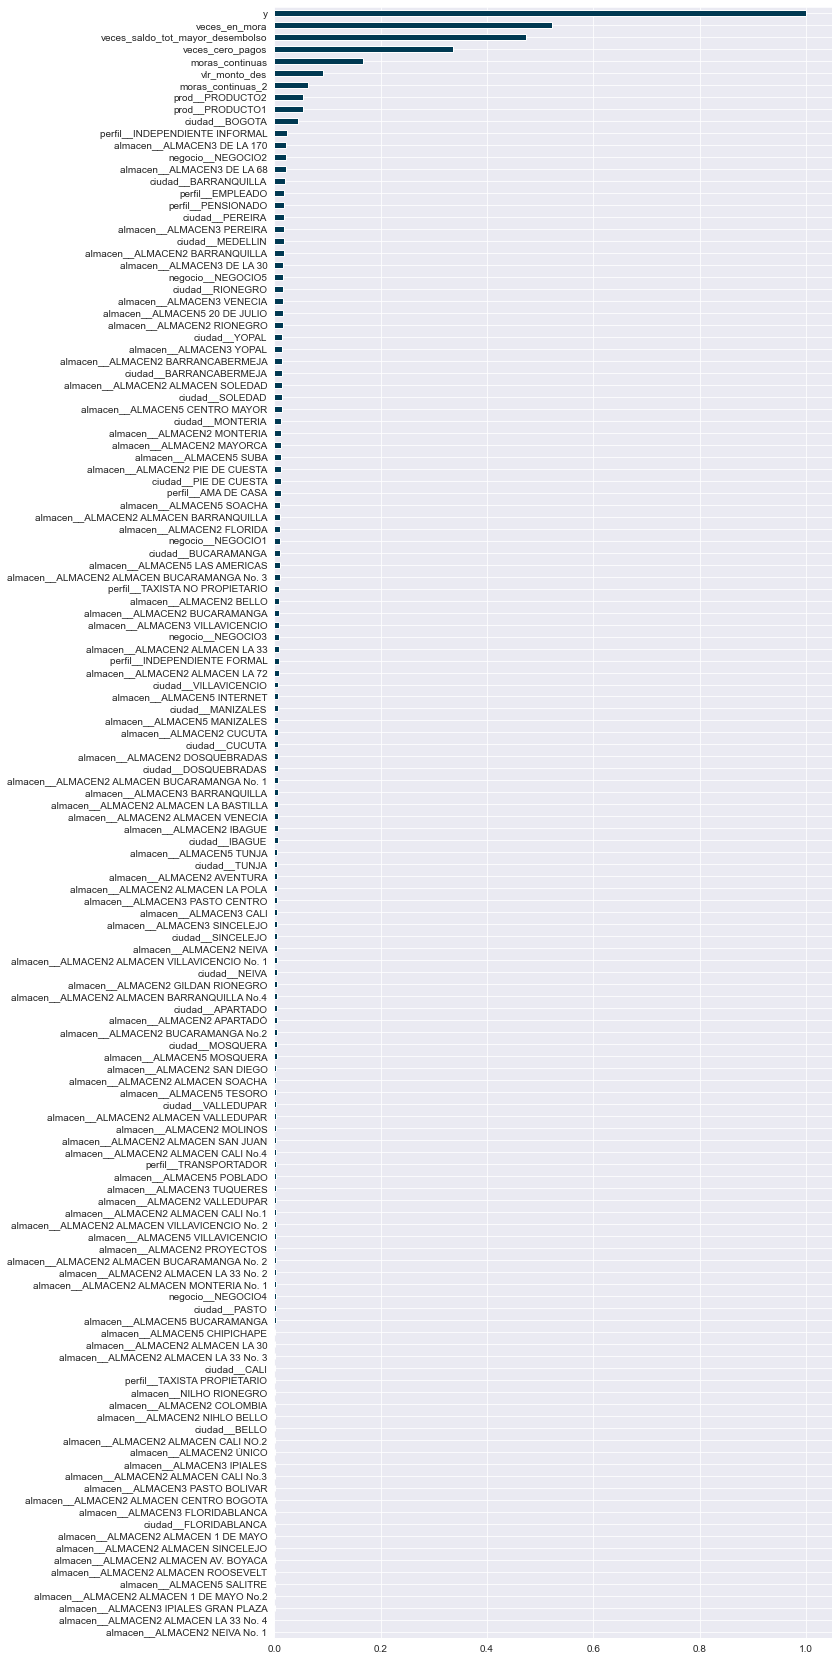

In [62]:
# Correlación de las variables vs variable objetivo
df_corr = df_final.copy() #creamos una copia del df para realizar el one hot encoding
df_corr = df_corr.merge(pd.get_dummies(df_corr["producto"], prefix='prod_'), left_index=True, right_index=True).copy()
df_corr = df_corr.merge(pd.get_dummies(df_corr["perfil"], prefix='perfil_'), left_index=True, right_index=True).copy()
df_corr = df_corr.merge(pd.get_dummies(df_corr["ciudad"], prefix='ciudad_'), left_index=True, right_index=True).copy()
df_corr = df_corr.merge(pd.get_dummies(df_corr["negocio"], prefix='negocio_'), left_index=True, right_index=True).copy()
df_corr = df_corr.merge(pd.get_dummies(df_corr["almacen"], prefix='almacen_'), left_index=True, right_index=True).copy()
df_corr.drop(['producto', 'perfil', 'ciudad', 'almacen', 'negocio', 'id_garantia'], axis=1, inplace=True)
df_corr = df_corr.corr()
df_corr['y'].abs().sort_values(ascending=True).plot.barh(figsize=(10,30), color="#003952")

Con este análisis de correlación evidenciamos que las variables categóricas no tiene una alta correlación con la variable objetivo. De igual forma las emplearemos para el entrenamiento inicial del modelo, una vez obtenidos analizaremos el error y la importancia de las variables en el modelo, y tomaremos la decisión de si eliminarlas o no

<h1><center>MODELADO</center></h1>

In [63]:
#importe de las librerias necesarias
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix, precision_score, recall_score

In [64]:
pd.set_option("max_rows", None)
sns.set_style("dark") #tema para las gráficas

In [65]:
#leemos el dataset producto de la limpieza y feature engineering previo
df = pd.read_csv('df_final_proyecto_estructuracion.csv')
df.head()

,id_garantia,vlr_monto_des,producto,perfil,ciudad,almacen,negocio,veces_en_mora,veces_saldo_tot_mayor_desembolso,veces_cero_pagos,moras_continuas,moras_continuas_2,y
0,6039898,192210,PRODUCTO2,INDEPENDIENTE INFORMAL,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,0,0.0,0.0,0,0,0
1,6039899,699904,PRODUCTO2,EMPLEADO,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,5,0.0,0.0,1,2,0
2,6039900,966900,PRODUCTO2,EMPLEADO,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,2,0.0,0.0,1,1,0
3,6039901,303770,PRODUCTO2,EMPLEADO,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,0,0.0,0.0,0,0,0
4,6039902,449898,PRODUCTO2,INDEPENDIENTE FORMAL,BOGOTA,ALMACEN3 DE LA 170,NEGOCIO3,2,0.0,0.0,1,1,0


## Modelado

Dado que para las iteraciones estaba reciclando mucho código, decidí realizar una función que nos ayude a comparar fácilmente los diferentes modelos, nos entregue la matriz de confusión, y además, nos retorne un dataframe con la importancia de las variables, para que podamos hacer un análisis más apropiado del error

In [66]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [67]:
def probar_modelos(df, one_hot=False, one_hot_list = [], drop_list = ['producto', 'perfil', 'ciudad', 'almacen', 'negocio', 'id_garantia']):
    #realizamos una copia del dataframe
    df_model = df.copy() 
    #realizamos el proceso de one_hot encoding 
    if one_hot:
        for i in one_hot_list: 
            df_model = df_model.merge(pd.get_dummies(df_model[i], prefix=i), left_index=True, right_index=True).copy()
    df_model.drop(drop_list, axis=1, inplace=True)
    
    #divimos el dataset en entrenamiento y pruebas
    X_train, X_test, y_train, y_test = train_test_split(df_model.loc[:, df_model.columns != 'y'], df_model['y'], test_size=0.3, stratify=df_model['y'])
    st = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    
    #definimos los modelos y los parámetros para el gridsearch
    rfc = RandomForestClassifier(class_weight='balanced_subsample')
    gbc = GradientBoostingClassifier()
    abc = AdaBoostClassifier()
    parameters_rfc = {'n_estimators':[100,120,140], 'criterion':['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}
    parameters_gbc = {'n_estimators':[100,120,140], 'criterion': ['friedman_mse', 'mse'], 'loss': ['deviance', 'exponential']}
    parameters_abc = {'n_estimators':[40,50,60], 'algorithm':['SAMME', 'SAMME.R']}
    models = [rfc, gbc, abc]
    parameters = [parameters_rfc, parameters_gbc, parameters_abc]
    
    grid_searchs = []
    #realizamos la busqueda de los mejores hiperparámentros
    for i in range(len(models)):
        gs = GridSearchCV(estimator=models[i], param_grid=parameters[i], cv=st, scoring='balanced_accuracy')
        gs.fit(X_train,y_train)
        grid_searchs.append(gs)
    
    
    #gráficamos las matrices de confusión y calculamos los errores en los dataset de entrenamiento y pruebas
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10)) 
    for cls, ax in zip(grid_searchs, axes.flatten()):
        train_predictions = cls.best_estimator_.predict(X_train)
        test_predictions = cls.best_estimator_.predict(X_test)
        train_error = f1_score(y_train, train_predictions)
        test_error = f1_score(y_test, test_predictions)
        plot_confusion_matrix(cls.best_estimator_, X_test, y_test, ax=ax, cmap='Blues', colorbar=False)
        ax.title.set_text(type(cls.best_estimator_).__name__)
        txt=f"Train F1 score {train_error}\nTest F1 score: {test_error}"
        ax.text(0.5,-0.3, txt, size=12, ha="center", transform=ax.transAxes)
    plt.tight_layout()  
    plt.show()
    
    #accuracy_score, precision_score, recall_score
    for cls in grid_searchs:
        test_predictions = cls.best_estimator_.predict(X_test)
        print(cls.best_estimator_)
        print('f1_score: ', round(f1_score(y_test, test_predictions), 3))
        print('accuracy_score: ', round(accuracy_score(y_test, test_predictions), 3))
        print('precision_score: ', round(precision_score(y_test, test_predictions), 3))
        print('recall_score: ', round(recall_score(y_test, test_predictions), 3))
        print('\n')
        
    
    importances = pd.DataFrame(list(zip(grid_searchs[0].best_estimator_.feature_importances_, \
                                        grid_searchs[1].best_estimator_.feature_importances_, grid_searchs[2].best_estimator_.feature_importances_)),
               columns =['RandomForest', 'GradientBoosting', 'AdaBoost'], index = X_train.columns)
    #retornamos el dataframe con los features importances y los modelos
    return importances, grid_searchs

---

## Baseline

Para el baseline usaremos un RandomForestClassifier con todas las variables categóricas y sin hacer la busqueda de los mejores hiperparámetros.

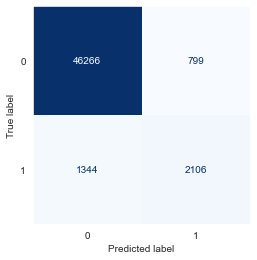

RandomForestClassifier(class_weight='balanced_subsample')
f1_score:  0.663
accuracy_score:  0.958
precision_score:  0.725
recall_score:  0.61


In [71]:
df_baseline = df.copy()
#Realizamos el proceso de one_hot encoding
for i in ['producto', 'perfil', 'ciudad', 'almacen', 'negocio']:  
    df_baseline = df_baseline.merge(pd.get_dummies(df_baseline[i], prefix=i), left_index=True, right_index=True).copy()
#Eliminamos las variables posterior al one hot encoding
df_baseline.drop(['producto', 'perfil', 'ciudad', 'almacen', 'negocio', 'id_garantia'], axis=1, inplace=True)
#División del dataset el train y test
X_train, X_test, y_train, y_test = train_test_split(df_baseline.loc[:, df_baseline.columns != 'y'], df_baseline['y'], test_size=0.3, stratify=df_baseline['y'])
#Definición del modelo
rfc = RandomForestClassifier(class_weight='balanced_subsample')
#Entrenamiento del modelo
rfc.fit(X_train,y_train)
#Predicciones
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)
#Matriz de confusion
plot_confusion_matrix(rfc, X_test, y_test, cmap='Blues', colorbar=False)
plt.show()
#Impresión de los resultados
print(rfc)
print('f1_score: ', round(f1_score(y_test, test_predictions), 3))
print('accuracy_score: ', round(accuracy_score(y_test, test_predictions), 3))
print('precision_score: ', round(precision_score(y_test, test_predictions), 3))
print('recall_score: ', round(recall_score(y_test, test_predictions), 3))

<b> Primer iteración, con todas las variables categóricas

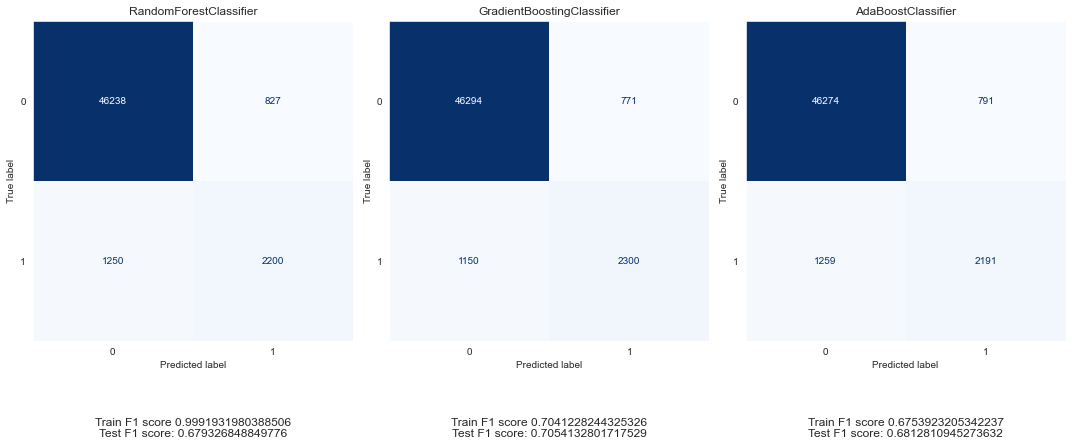

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt', n_estimators=140)
f1_score:  0.679
accuracy_score:  0.959
precision_score:  0.727
recall_score:  0.638


GradientBoostingClassifier(loss='exponential', n_estimators=140)
f1_score:  0.705
accuracy_score:  0.962
precision_score:  0.749
recall_score:  0.667


AdaBoostClassifier()
f1_score:  0.681
accuracy_score:  0.959
precision_score:  0.735
recall_score:  0.635




In [72]:
df_importances_baseline, modelos_baseline = probar_modelos(df, one_hot = True, one_hot_list=['producto', 'perfil', 'ciudad', 'almacen', 'negocio'])

<b>Análisis del error</b>

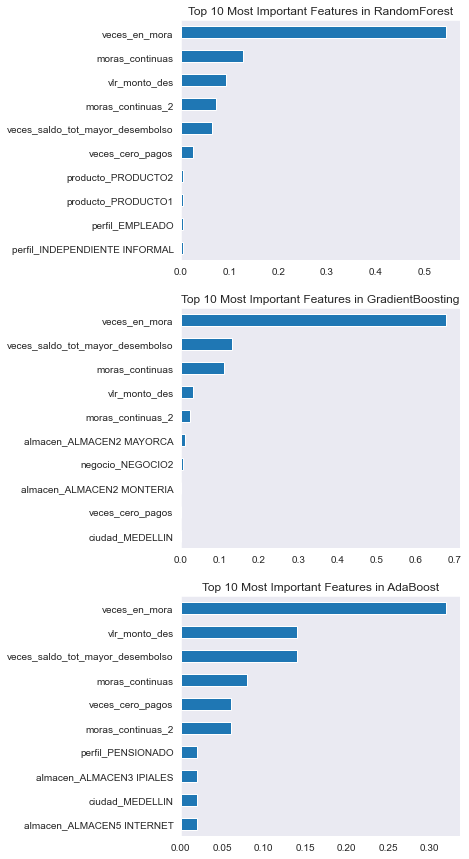

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_baseline[m].sort_values(ascending=True).tail(10).plot.barh(title=f'Top 10 Most Important Features in {m}', ax=ax) 
plt.show()

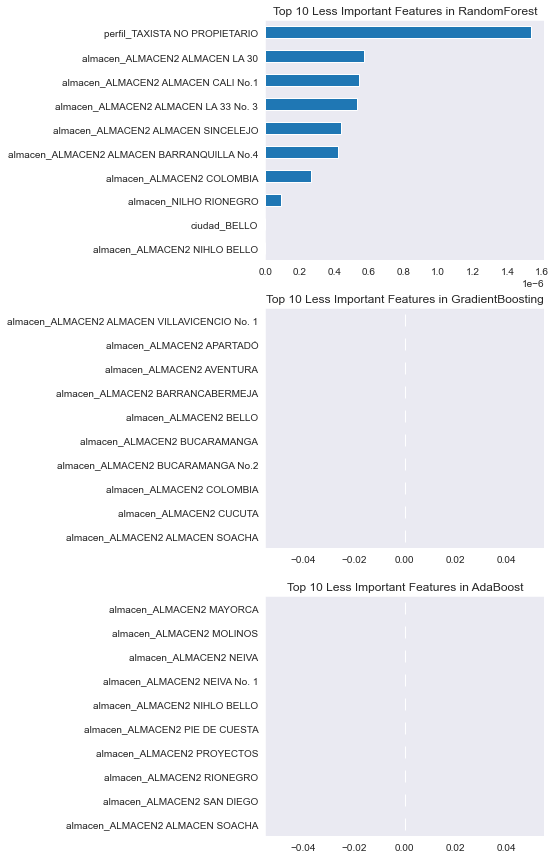

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_baseline[m].sort_values(ascending=True).head(10).plot.barh(title=f'Top 10 Less Important Features in {m}', ax=ax) 
plt.show()

Cómo esperabamos, las variables categóricas como almacen y negocio no son relevantes para los modelos. Ahora probaremos los modelos sin la variable almacen y con la variable negocio, y viceversa.

---

<b>Segunda iteración, modelos sin almacenes</b>

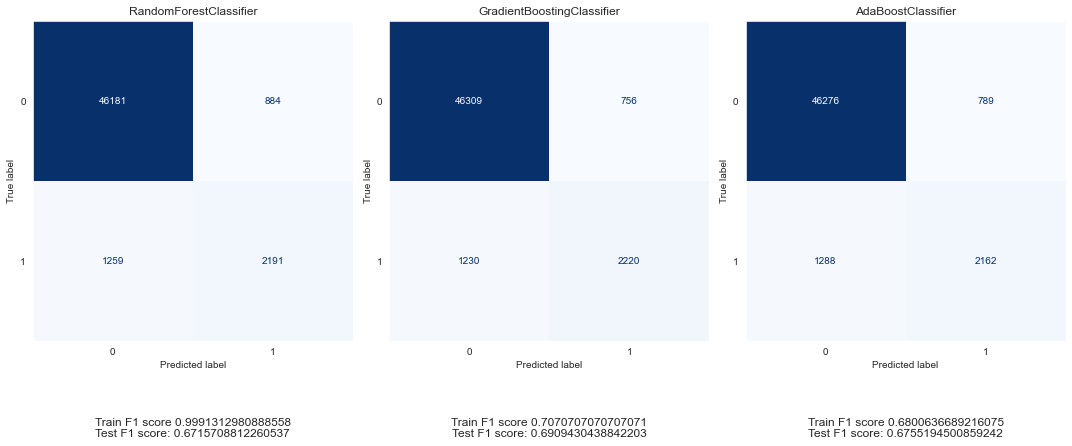

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=140)
f1_score:  0.672
accuracy_score:  0.958
precision_score:  0.713
recall_score:  0.635


GradientBoostingClassifier(loss='exponential', n_estimators=140)
f1_score:  0.691
accuracy_score:  0.961
precision_score:  0.746
recall_score:  0.643


AdaBoostClassifier(n_estimators=40)
f1_score:  0.676
accuracy_score:  0.959
precision_score:  0.733
recall_score:  0.627




In [75]:
df_importances_1, modelos_1 = probar_modelos(df, one_hot = True, one_hot_list=['producto', 'perfil', 'ciudad', 'negocio'])

<b>Features más importantes en modelos sin almacen </b>

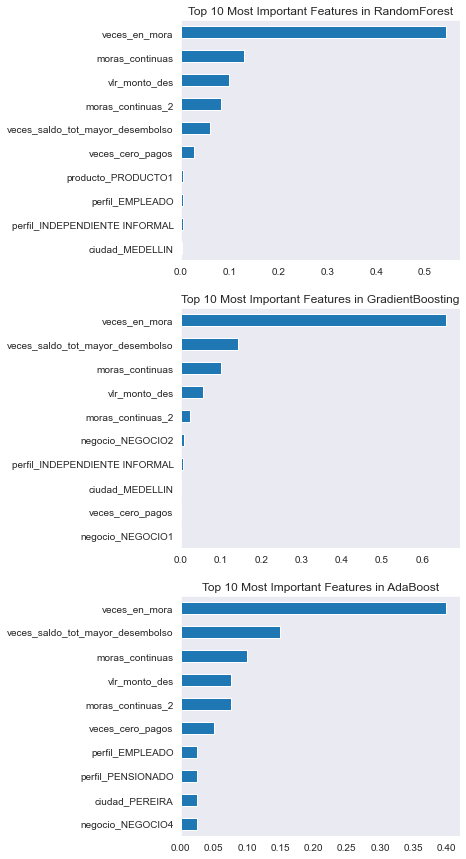

In [76]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_1[m].sort_values(ascending=True).tail(10).plot.barh(title=f'Top 10 Most Important Features in {m}', ax=ax) 
plt.show()

<b>Features menos importantes en modelos sin almacen </b>

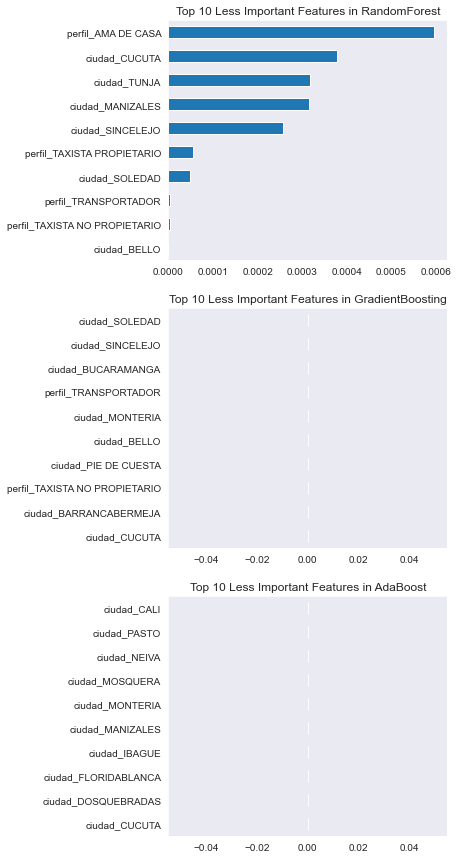

In [77]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_1[m].sort_values(ascending=True).head(10).plot.barh(title=f'Top 10 Less Important Features in {m}', ax=ax) 
plt.show()

---

<b>tercera iteración, modelos sin negocio</b>

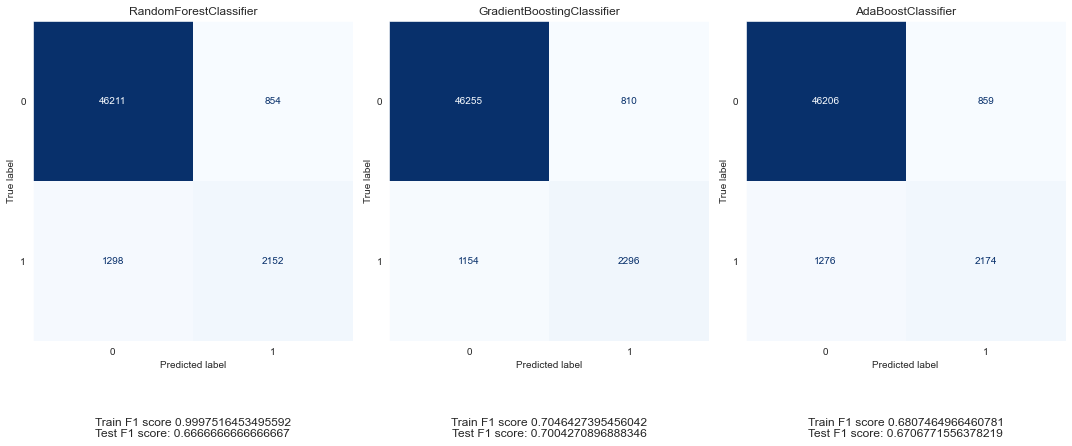

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt', n_estimators=140)
f1_score:  0.667
accuracy_score:  0.957
precision_score:  0.716
recall_score:  0.624


GradientBoostingClassifier(loss='exponential', n_estimators=140)
f1_score:  0.7
accuracy_score:  0.961
precision_score:  0.739
recall_score:  0.666


AdaBoostClassifier(n_estimators=60)
f1_score:  0.671
accuracy_score:  0.958
precision_score:  0.717
recall_score:  0.63




In [78]:
df_importances_2, modelos_2 = probar_modelos(df, one_hot = True, one_hot_list=['producto', 'perfil', 'ciudad', 'almacen'])

<b>Features mas importantes en modelos sin negocio </b>

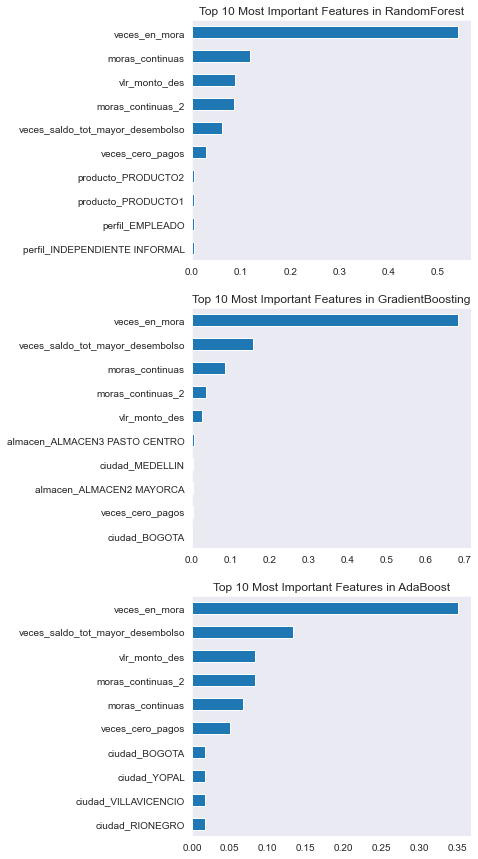

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_2[m].sort_values(ascending=True).tail(10).plot.barh(title=f'Top 10 Most Important Features in {m}', ax=ax) 
plt.show()

<b>Features menos importantes en modelos sin negocio </b>

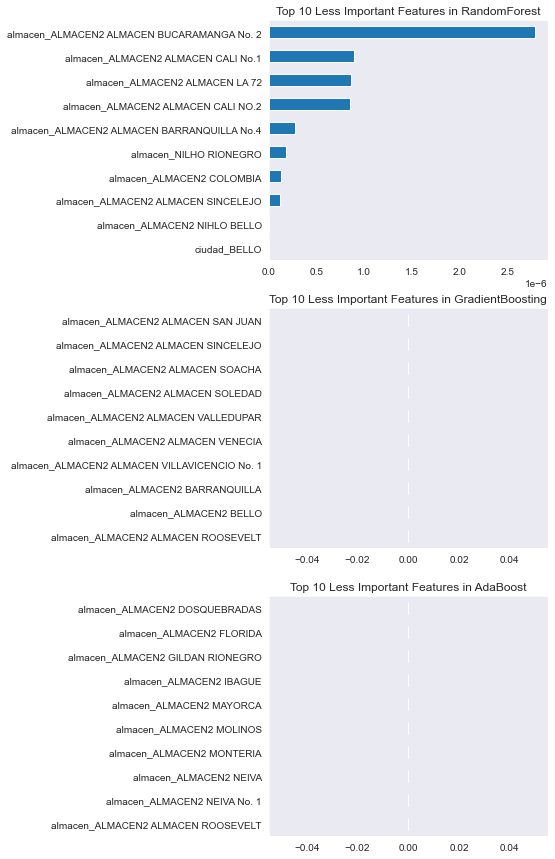

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_2[m].sort_values(ascending=True).head(10).plot.barh(title=f'Top 10 Less Important Features in {m}', ax=ax) 
plt.show()

---

<b>Modelos sin negocio ni almacen</b>

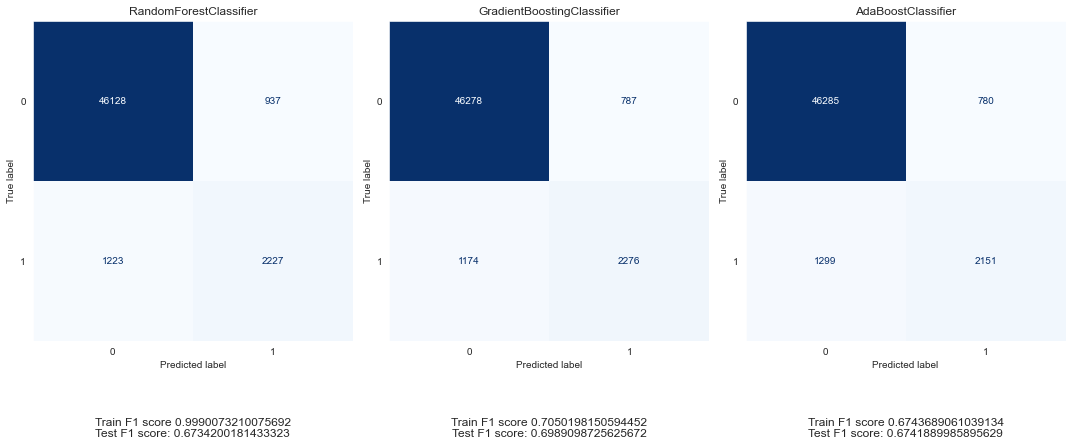

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=140)
f1_score:  0.673
accuracy_score:  0.957
precision_score:  0.704
recall_score:  0.646


GradientBoostingClassifier(loss='exponential', n_estimators=140)
f1_score:  0.699
accuracy_score:  0.961
precision_score:  0.743
recall_score:  0.66


AdaBoostClassifier(n_estimators=60)
f1_score:  0.674
accuracy_score:  0.959
precision_score:  0.734
recall_score:  0.623




In [81]:
df_importances_3, modelos_3 = probar_modelos(df, one_hot = True, one_hot_list=['producto', 'perfil', 'ciudad'])

<b>Features más importantes en modelos sin negocio ni almacen</b>

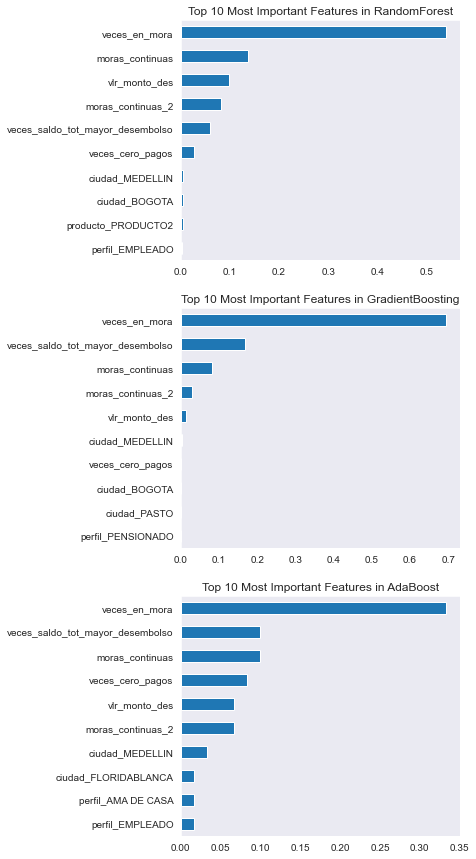

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_3[m].sort_values(ascending=True).tail(10).plot.barh(title=f'Top 10 Most Important Features in {m}', ax=ax) 
plt.show()

---

<b>Modelos sin variables categóricas</b>

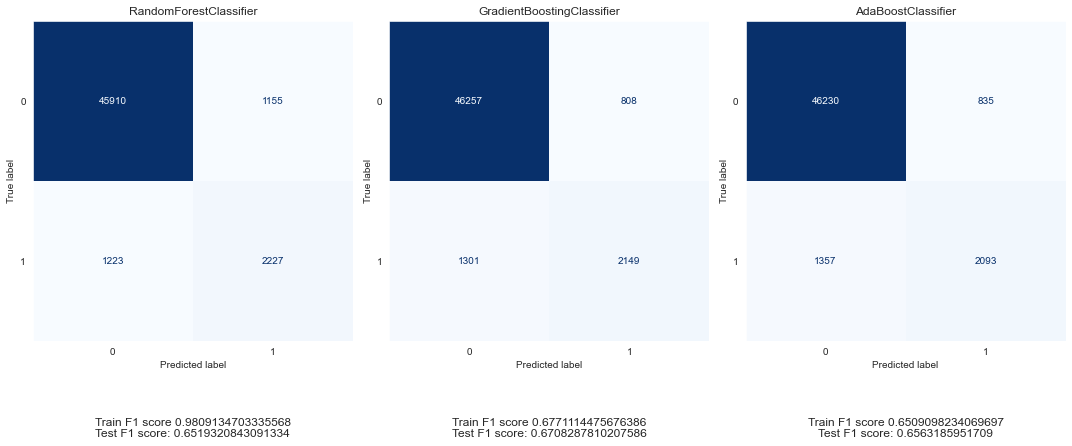

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='log2')
f1_score:  0.652
accuracy_score:  0.953
precision_score:  0.658
recall_score:  0.646


GradientBoostingClassifier(loss='exponential')
f1_score:  0.671
accuracy_score:  0.958
precision_score:  0.727
recall_score:  0.623


AdaBoostClassifier(n_estimators=60)
f1_score:  0.656
accuracy_score:  0.957
precision_score:  0.715
recall_score:  0.607




In [85]:
df_importances_4, modelos_4 = probar_modelos(df)

<b>Features más importantes en modelo sin variables categóricas</b>

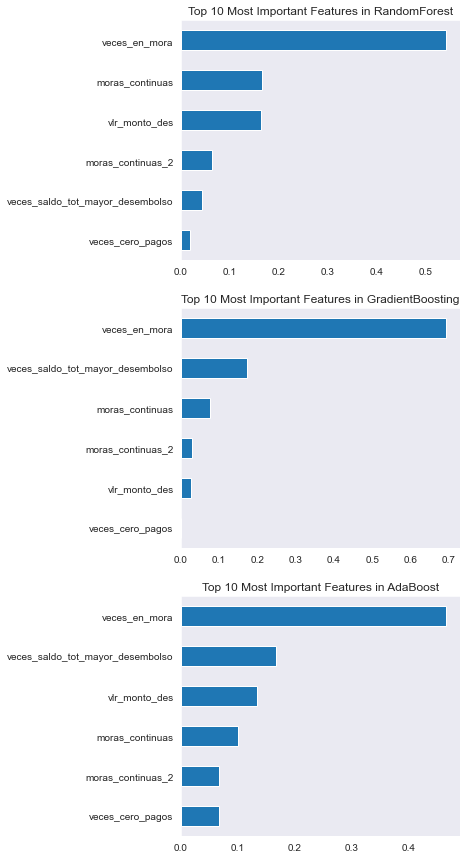

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15)) 
for m, ax in zip(['RandomForest', 'GradientBoosting', 'AdaBoost'], axes.flatten()):
    df_importances_4[m].sort_values(ascending=True).plot.barh(title=f'Top 10 Most Important Features in {m}', ax=ax) 
plt.show()

## Conclusión

En conclusión, evidenciamos que el modelo que mejor se desempeño fue aquel en el que empleamos todas las variables categóricas.